In [28]:
import pandas as pd 
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(r"C:\Users\conte\Downloads\SOCR-HeightWeight.csv")

In [31]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [33]:
df = df.drop(columns=["Index"])

In [34]:
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


Text(0, 0.5, 'Height(Inches)')

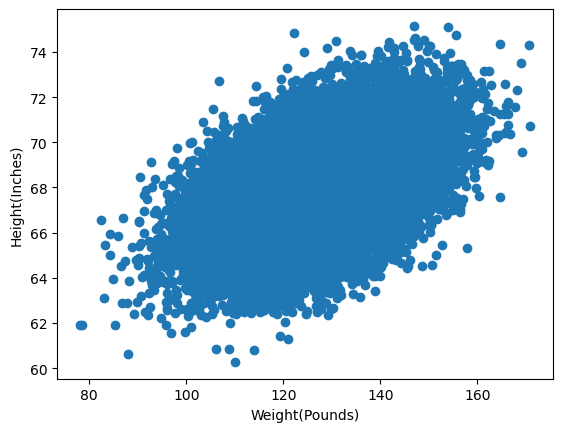

In [36]:
#scatter plt
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel("Weight(Pounds)")
plt.ylabel("Height(Inches)")

In [37]:
#Correlation
df.corr()


,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [38]:
import seaborn as sns

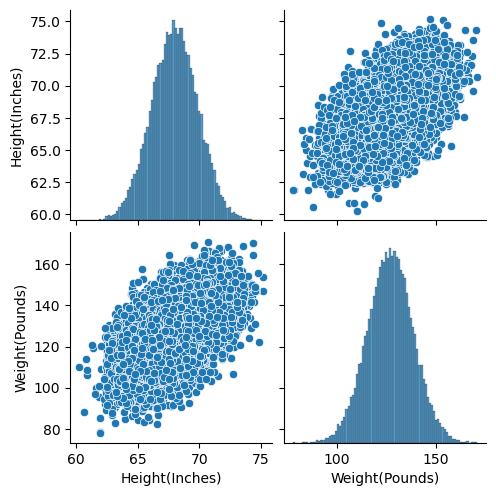

In [39]:
sns.pairplot(df)

In [48]:
#Independent and dependent variables
X = df[['Weight(Pounds)']]
y = df[['Height(Inches)']]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [57]:
X_test = scaler.transform(X_test)

In [58]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [60]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [61]:
regression = LinearRegression()

In [64]:
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
print("Slope: " ,regression.coef_)
print("Intercept: " ,regression.intercept_)

Slope:  [[0.08159195]]
Intercept:  [57.62599824]


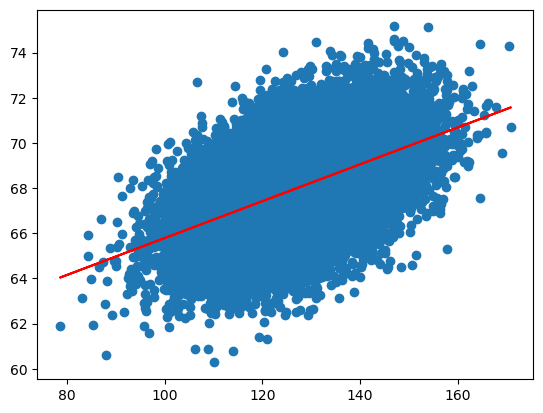

In [72]:
#plot
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="red")

In [73]:
#prediction for test data
regression.predict(X_test)

C:\Users\conte\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[57.67662893],
       [57.52003502],
       [57.6885677 ],
       ...,
       [57.68632813],
       [57.53070666],
       [57.62619928]])

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Predictions
y_pred = regression.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Cross-validation
scores = cross_val_score(regression, X, y, cv=5, scoring='r2')
print(f"Average Cross-Validation R²: {scores.mean():.4f}")


R² Score: -29.0704
MAE: 10.3647
RMSE: 10.5339
Average Cross-Validation R²: 0.2523


C:\Users\conte\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
regression.predict(scaler.transform(([[69]]))

_IncompleteInputError: incomplete input (1679587469.py, line 1)